# Precipitation exercises
***

## <font color=steelblue>Exercise 3 - Double-mass curve</font>

<font color=steelblue>Perform a double-mass curve analysis with the data in sheet *Exercise_003* from file *RainfallData.xlsx*.</font>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

from scipy.optimize import curve_fit

### Import data

In [2]:
# Importar los datos
data3 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='Exercise_003',
                      skiprows=0, index_col=0)

# name of the gages
gages = data3.columns

# calculate the mean across stations
data3['AVG'] = data3.mean(axis=1)

data3.head()

,A,B,C,D,E,AVG
Year,,,,,,
1926,39.75,45.70,30.69,37.36,32.85,37.270
1927,39.57,38.52,40.99,30.87,28.08,35.606
1928,42.01,48.26,40.44,42.00,33.51,41.244
1929,41.39,34.64,32.49,39.92,29.58,35.604
1930,31.55,45.13,36.72,36.32,23.76,34.696


### Double-mass curves
We are going to plot simultaneously the double-mass curve for all the stations, so we can start identifying stations that may have problems.

To plot several plots in the same figure, we will use the function `subplots` in `Matplotlib`.

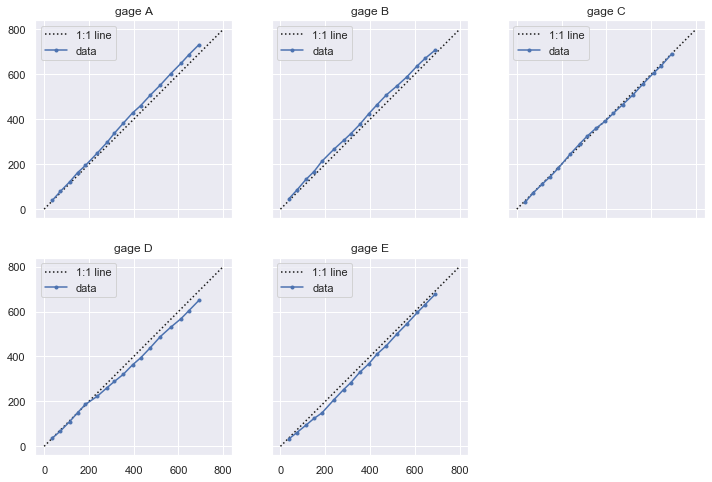

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

for (gage, ax) in zip(gages, axes.flatten()):
    # line of slope 1
    ax.plot((0, 800), (0, 800), ':k', label='1:1 line')
    # double-mass curve
    ax.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='data')
    ax.set_title('gage ' + gage)
    ax.legend()
    
axes[1, 2].axis('off');

From the plot we are certain that the series in gage C is correct, but there might be problems in the rest of the gages.

### Identify errors
The double-mass curve must represent a linear regression with no intercept. We will create a function representing this linear regression which we will use in the following steps.

In [4]:
def linear_reg(x, m):
    """Linear regression with no intecept
    
    y = m * x   
    
    Input:
    ------
    x:         float. Independet value
    m:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = m * x
    
    return y

#### Gage A
To identify errors, we will have to fit the linear regression with no intercept to both the series before and after a specific year; if the diference in the fitted slope for those two series exceed an error threshold, we identify that year as a break point in the double-mass curve. We will iterate this process for each year and set a error threshold (or tolerance) to find all the possible break points in the series.

In [5]:
# define the gage
gage = 'A'

In [6]:
# define the error threshold
error = .2

In [7]:
for year in data3.index[3:-3]:
    # fit the regression from 1978 onwards
    m1 = curve_fit(linear_reg, data3.loc[:year, 'AVG'].cumsum(), data3.loc[:year, gage].cumsum())[0][0]
    # fit the regression from 1978 onwards
    m2 = curve_fit(linear_reg, data3.loc[year:, 'AVG'].cumsum(), data3.loc[year:, gage].cumsum())[0][0]
    ## correction factor
    #factor = m1 / m2
    #if (factor < 1 - error) | (factor > 1. + error):
    if abs(m1 - m2) > error:
        print('{0}   m1 = {1:.3f}   m2 = {2:.3f}   factor = {3:.3f}'.format(year, m1, m2, factor))

There are no errors in the series of gage A. 

#### All gages
Simply changing the name of the gage in the previous section we can repeat the process. Let's create a function and the run it in a a loop.

In [8]:
def identify_errors(dataGage, dataAVG, error=.1):
    """Identify possible break points in the double-mass curve
    
    Parameters:
    -----------
    dataGage:  series. Annual series for the gage to be checked
    dataAVG:   series. Annual series of the mean across gages in a region
    error:     float. Error threshold
    
    Output:
    -------
    It will print the years with a difference in slopes higher than 'error', alon with the values of the slopes.
    """
    
    for year in dataGage.index[3:-3]:
        # fit the regression from 1978 onwards
        m1 = curve_fit(linear_reg, dataAVG.loc[:year].cumsum(), dataGage.loc[:year].cumsum())[0][0]
        # fit the regression from 1978 onwards
        m2 = curve_fit(linear_reg, dataAVG.loc[year:].cumsum(), dataGage.loc[year:].cumsum())[0][0]
        ## correction factor
        #factor = m1 / m2
        #if (factor < 1 - error) | (factor > 1. + error):
        if abs(m1 - m2) > error:
            print('{0}   m1 = {1:.3f}   m2 = {2:.3f}'.format(year, m1, m2))

In [9]:
for gage in gages:
    print('Gage ', gage)
    identify_errors(data3['AVG'], data3[gage], error=.1)
    print()

Gage  A

Gage  B
1929   m1 = 0.878   m2 = 0.981
1930   m1 = 0.874   m2 = 0.978
1931   m1 = 0.883   m2 = 1.006
1932   m1 = 0.897   m2 = 1.007
1936   m1 = 0.922   m2 = 1.028
1937   m1 = 0.924   m2 = 1.054
1938   m1 = 0.929   m2 = 1.084
1939   m1 = 0.935   m2 = 1.051

Gage  C

Gage  D
1930   m1 = 1.004   m2 = 1.107

Gage  E
1929   m1 = 1.203   m2 = 1.002
1930   m1 = 1.223   m2 = 0.986
1931   m1 = 1.191   m2 = 0.954
1932   m1 = 1.161   m2 = 0.962
1933   m1 = 1.143   m2 = 0.963
1934   m1 = 1.122   m2 = 0.954
1935   m1 = 1.108   m2 = 0.971
1936   m1 = 1.093   m2 = 0.954
1937   m1 = 1.085   m2 = 0.978
1938   m1 = 1.075   m2 = 0.945
1939   m1 = 1.066   m2 = 0.962



We have identified errors in gages B, D and E. This was an automatic search to discard correct stations. Now, we have to analyse one by one these three stations that might have errors.

### Correct errors
#### Gage B
##### Analyse the series
We have identified anomalies in the years between 1929 and 1939. It will probably mean that there are two break points in the double mass curve. Let's look at the double mass curve and the specific points representing those two years.

In [10]:
# set gage and year corresponding to the break in the line
gage = 'B'
breaks = [1929, 1939]

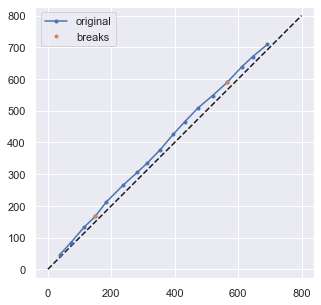

In [11]:
# visualize
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

At a glance, we can identify three periods. There is period at the beginning of the series with a higher than usual slope; this period seem so extend until 1930 (not 1929 as we had identified). There is aperiod at the end of the series with a lower than usual slope; this period seems to start in 1938 (not 1939 as we had identified).

We will reset the break points and calculate the slope of the regression to check it.

In [12]:
# reset the break points
breaks = [1930, 1938]

In [13]:
# fit the regression untill the first break
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression from the first to the second break
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:breaks[1], 'AVG'].cumsum(), data3.loc[breaks[0]:breaks[1], gage].cumsum())[0][0]
# fit the regression from t
m3 = curve_fit(linear_reg, data3.loc[breaks[1]:, 'AVG'].cumsum(), data3.loc[breaks[1]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}   m3 = {2:.3f}'.format(m1, m2, m3))

m1 = 1.144   m2 = 1.045   m3 = 0.922


As expected, there are three different slopes in the series. We will assume that the correct data is that from 1930 to 1937, because it is longest period of the three and its slope is closer to 1. Therefore, we have to calculate the correction factors for two periods: before 1930 and after 1937; with these factors we can correct the series.

##### Correct the series

In [14]:
# correction factors
factor12 = m2 / m1
factor23 = m2 / m3

factor12, factor23

(0.9129617218111449, 1.133101596550879)

In [15]:
# copy of the original series
data3['B_'] = data3[gage].copy()
# correct period before the first break
data3.loc[:breaks[0], 'B_'] *= factor12
# correct period after the second break
data3.loc[breaks[1]:, 'B_'] *= factor23

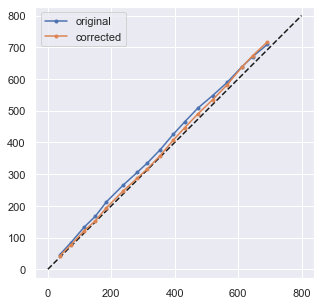

In [16]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3['B_'].cumsum(), '.-', label='corrected')
plt.legend();

Now we can check again for errors in the correceted series.

In [17]:
# chech again for errors
identify_errors(data3.B_, data3.AVG)

There aren't any more errors, so we've done correcting data from gage B.

#### Gage D
##### Analyse the series
We found a break point in year 1930.

In [18]:
# set gage and year corresponding to the break in the line
gage = 'D'
breaks = [1930]

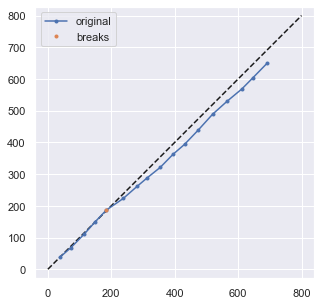

In [19]:
# visualize
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

In [20]:
# fit the regression untill the break
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression after the break
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}'.format(m1, m2))

m1 = 0.996   m2 = 0.903


This case is simpler than the previous and we easily spot the breal point in 1930. THe period before 1930 has a slope closer to 1, so we will assume that this is the correct part of the series.

##### Correct the series

In [21]:
# correction factor
factor = m1 / m2

factor

1.1026631111918022

In [22]:
# copy of the original series
data3[gage + '_'] = data3[gage].copy()
# correct period after the break
data3.loc[breaks[0]:, gage + '_'] *= factor

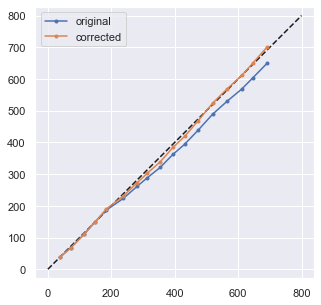

In [23]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [24]:
# chech again for errors
identify_errors(data3[gage + '_'], data3.AVG, error=.1)

1935   m1 = 0.971   m2 = 1.075
1937   m1 = 0.975   m2 = 1.087


We identify two more possible break point in the corrected series. Both might indicate that the last section of the series has a higher slope that the initial. Let's correct the series from 1935 on, and this may solve the second break point in 1937.

In [25]:
gage = 'D_'
breaks = [1935]

In [26]:
# fit the regression untill the break
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression after the break
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}'.format(m1, m2))

m1 = 0.971   m2 = 1.075


In [27]:
# correction factor
factor = m1 / m2

factor

0.9034952502585142

In [28]:
# copy of the original series
data3[gage + '_'] = data3[gage].copy()
# correct period after the break
data3.loc[breaks[0]:, gage + '_'] *= factor

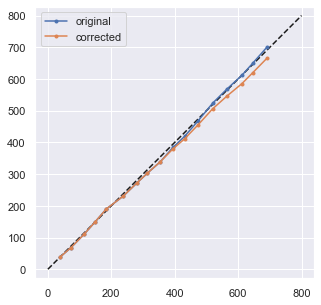

In [29]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [30]:
# chech again for errors
identify_errors(data3[gage + '_'], data3.AVG, error=.1)

#### Gage E
##### Analyse the series
The series in gage E has a similar behaviour to series B. There is an anomaly in the series between 1929 and 1938, indicating that there might be two break points in the double-mass curve.

In [31]:
# set gage and year corresponding to the break in the line
gage = 'E'
breaks = [1929, 1938]

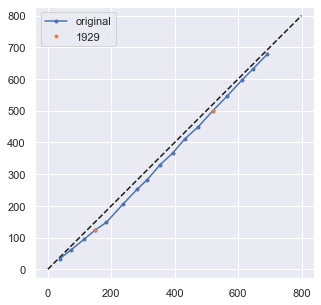

In [32]:
# visualize
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='1929')
plt.legend();

In [33]:
# fit the regression untill the first break
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression from the first to the second break
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:breaks[1], 'AVG'].cumsum(), data3.loc[breaks[0]:breaks[1], gage].cumsum())[0][0]
# fit the regression from the second break on
m3 = curve_fit(linear_reg, data3.loc[breaks[1]:, 'AVG'].cumsum(), data3.loc[breaks[1]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}   m3 = {2:.3f}'.format(m1, m2, m3))

m1 = 0.831   m2 = 0.980   m3 = 1.058


There seems to be only one break in the line between the first and the second period. The slopes in the second and third periods are that close that, most probably, there isn't a change from 1938 on. Apart from that, the break in the line seems to be stronger in 1930 than in 1929, so we will change the breaks to only include 1930. We will assume that the period to be corrected is that before 1930.

In [34]:
breaks = [1930]
# fit the regression untill the first break
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression from the first break
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]

m1, m2

(0.8176415003641067, 1.0142506420191348)

##### Correct the series

In [35]:
# correction factor
factor = m2 / m1

factor

1.2404588582740426

In [36]:
# copy of the original series
data3['E_'] = data3[gage].copy()
# correct period before the first break
data3.loc[:breaks[0], 'E_'] *= factor

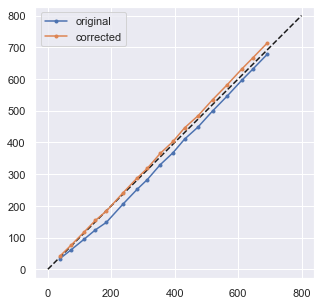

In [37]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [38]:
# chech again for errors
identify_errors(data3[gage + '_'], data3.AVG)

We don't identify any more errors, so the assumption that the slopes of the second and third period were close enough was correct.

#### Redraw the double-mass plot

In [39]:
# recalculate the average
gages = ['A', 'B_', 'C', 'D__', 'E_']
data3['AVG_'] = data3[gages].mean(axis=1)

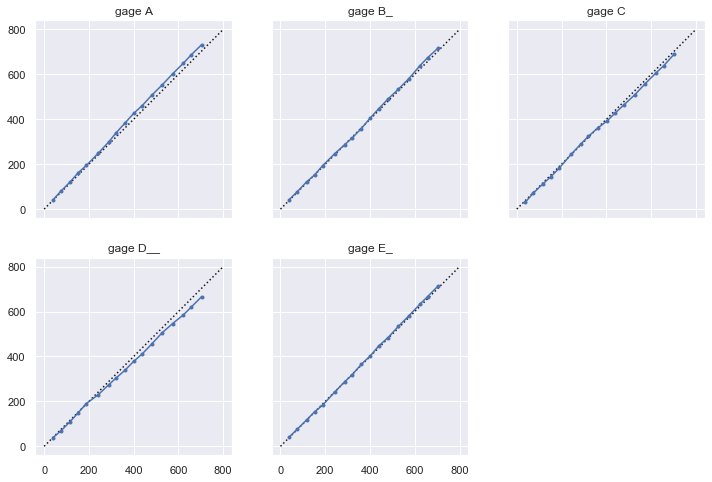

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

for (gage, ax) in zip(gages, axes.flatten()):
    ax.plot((0, 800), (0, 800), ':k')
    # double-mass curve
    ax.plot(data3.AVG_.cumsum(), data3[gage].cumsum(), '.-', label='corrected')
    ax.set_title('gage ' + gage)
    
axes[1, 2].axis('off');
                
# save figure
plt.savefig('../output/Ex3_double-mass curve.png', dpi=300)

In [41]:
# export corrected series
data3_ = data3.loc[:, gages]
data3_.columns = ['A', 'B', 'C', 'D', 'E']
data3_.to_csv('../output/Ex3_corrected series.csv', float_format='%.2f')